### Python library

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
with open('Distance_File.xlsx', 'r') as dist:
    edgereader =pd.read_excel('Distance_File.xlsx')
    edges = [tuple(e) for e in edgereader][:]

In [17]:
dist= pd.read_excel('Distance_File.xlsx')
dist = pd.DataFrame(dist)
dist.head()

,Route Id,Origin,Destination,Distance
0,1,A,B,0.44
1,2,A,C,1.89
2,3,A,D,0.10
3,4,B,H,2.44
4,5,B,E,3.45


In [66]:
edges= dist[['Distance','Origin', 'Destination']]
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, 'Origin', 'Destination','Distance')
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 45
Average degree:   2.3684


### Transport network showing weights between the nodes

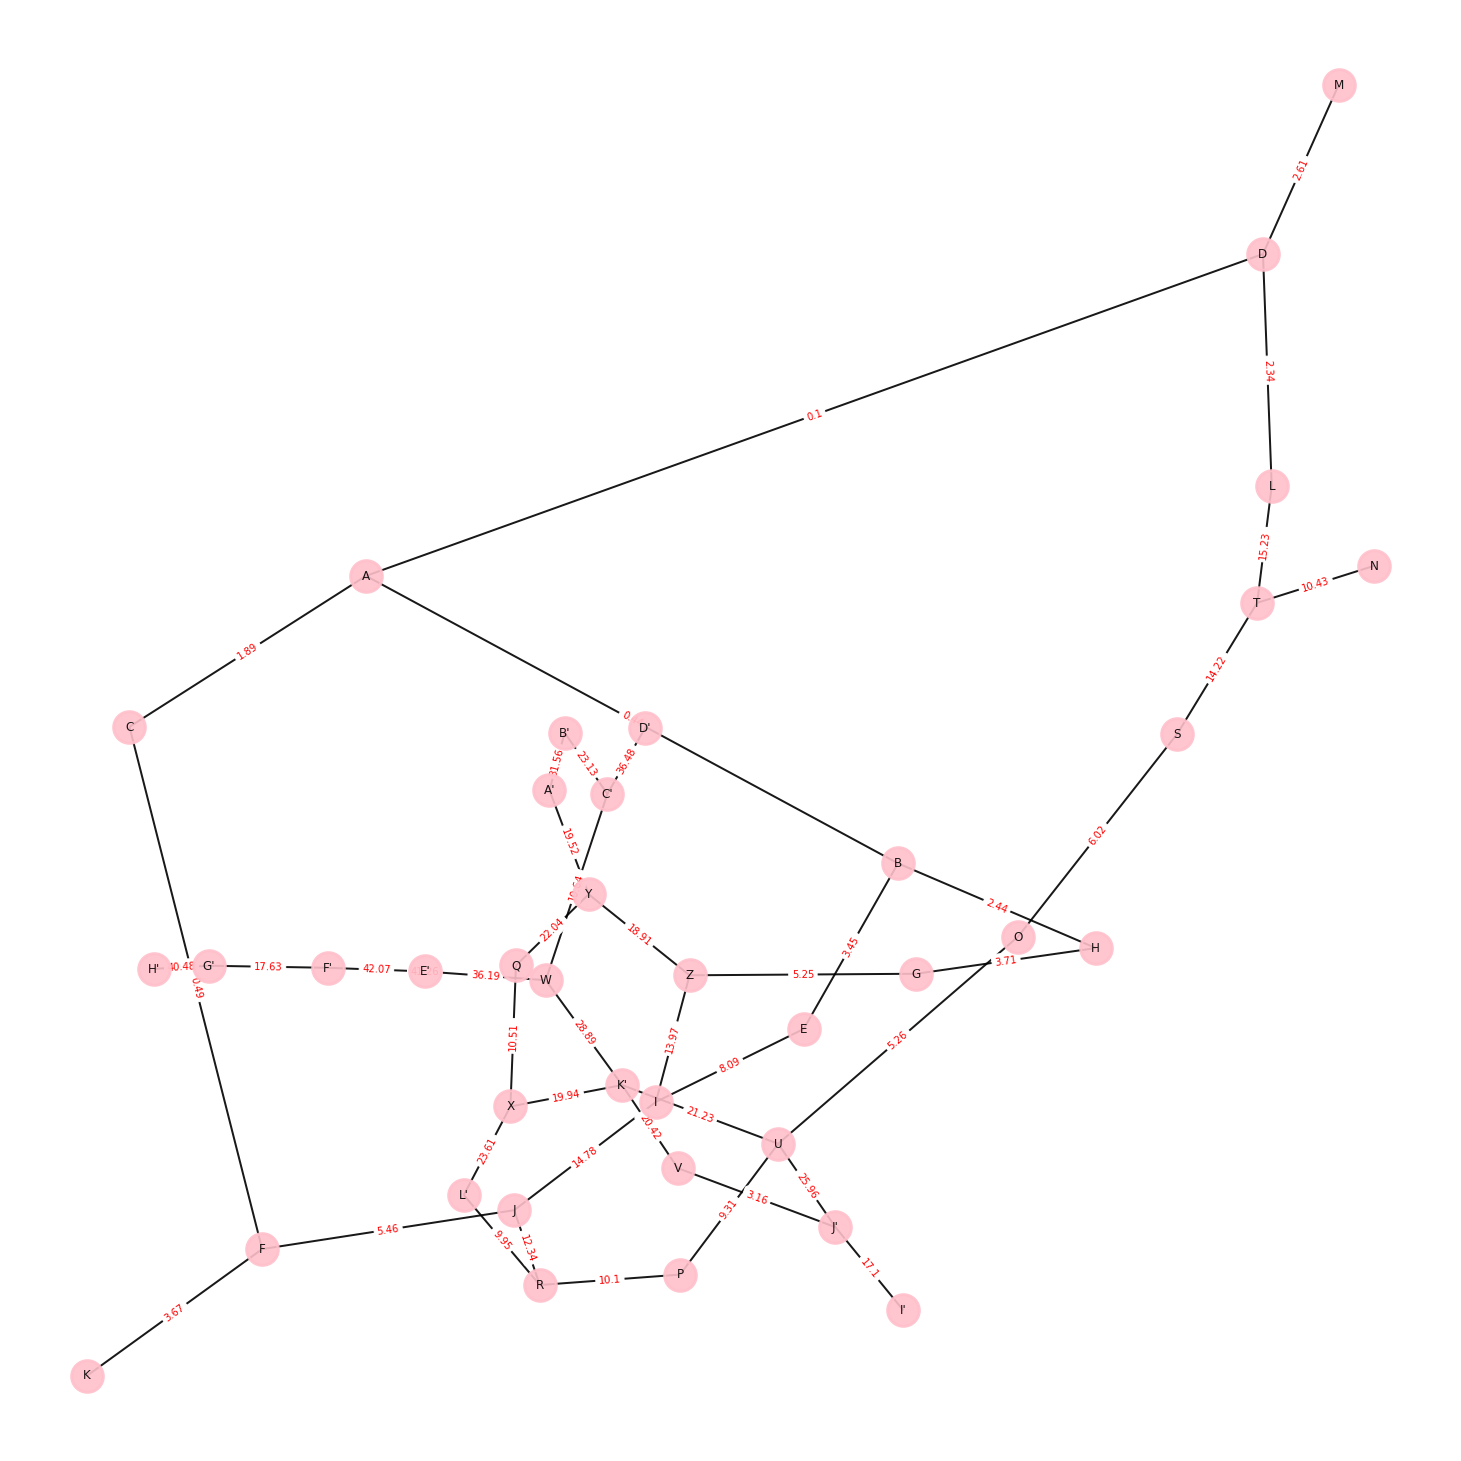

In [77]:
figure(figsize=(20, 20))
nx.draw(G,pos,edge_color='black',width=2,linewidths=3,
node_size=1000,node_color='pink',alpha=0.9,
labels={node:node for node in G.nodes()})

nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):0.44,('A','C'):1.89,('A','D'):0.1,('B','H'):2.44,
('B','E'):3.45,('C','F'):0.49,('D','L'):2.34,('D','M'):2.61,('H','G'):3.71,('E','I'):8.09,('F','J'):5.46,
('F','K'):3.67,('G','Z'):5.25,('I','Z'):13.97,('I','J'):14.78,('L','T'):15.23,('T','N'):10.43,('T','S'):14.22,
('S','O'):6.02,('O','U'):5.26,('J','R'):12.34,('R','P'):10.1,('R',"L'"):9.95,('Z','Y'):18.91,('Y','Q'):22.04,
('Q','X'):10.51,("L'",'X'):23.61,('X',"K'"):19.94,('P','U'):9.31,('U',"K'"):21.23,('U',"J'"):25.96,("J'",'V'):3.16,
("K'",'V'):20.42,("J'","I'"):17.1,('Y',"A'"):19.52,("A'","B'"):31.56,("B'","C'"):23.13,("K'",'W'):28.89,('W',"C'"):10.64,
('W',"E'"):36.19,("C'","D'"):36.48,("E'","E'"):41.26,("E'","F'"):42.07,("F'","G'"):17.63,("G'","H'"):40.48,},font_color='red')
plt.axis('off')
plt.draw()

###  Creation of an algorithm that will determine the minimum spanning tree.

The algorithm creates a minimum spanning tree from a weighted undirected graph by adding edges in ascending order of weights till all the vertices are contained in it. The algorithm gets greedy as it chooses edges in increasing order of weights. The algorithm makes sure that the addition of new edges to the spanning tree does not create a cycle within it.

##### Step 1 

Sort all the edges in non-decreasing order of their weight.

##### Step 2 

Pick the smallest edge. Check if it forms a cycle with the spanning tree formed so far using Union Find data-structure. If cycle is not formed, include this edge else, discard it.

##### Step 3 

Repeat Step 2 until there are (V-1) edges in the spanning tree.

In [6]:
parent = dict()
rank = dict()

def make_set(vertice):
    parent[vertice] = vertice
    rank[vertice] = 0

def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
        if rank[root1] == rank[root2]:
            rank[root2] += 1

def kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)
        minimum_spanning_tree = set()
        edges = list(graph['edges'])
        edges.sort()
        #print edges
    for edge in edges:
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            union(vertice1, vertice2)
            minimum_spanning_tree.add(edge)
	    
    return sorted(minimum_spanning_tree)

graph = {
'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',"A'","B'","C'","D'","E'","F'","G'","H'","I'","J'","K'","L'"],
'edges': set([(0.44,'A','B'),(1.89,'A','C'),(0.1,'A','D'),(2.44,'B','H'),(3.45,'B','E'),(0.49,'C','F'),(2.34,'D','L'),(2.61,'D','M'),
(3.71,'H','G'),(8.09,'E','I'),(5.46,'F','J'),(3.67,'F','K'),(5.25,'G','Z'),(13.97,'I','Z'),(14.78,'I','J'),(15.23,'L','T'),(10.43,'T','N'),
(14.22,'T','S'),(6.02,'S','O'),(5.26,'O','U'),(12.34,'J','R'),(10.1,'R','P'),(9.95,'R',"L'"),(18.91,'Z','Y'),(22.04,'Y','Q'),(10.51,'Q','X'),
(23.61,"L'",'X'),(19.94,'X',"K'"),(9.31,'P','U'),(21.23,'U',"K'"),(25.96,'U',"J'"),(3.16,"J'",'V'),(20.42,"K'",'V'),(17.1,"J'","I'"),
(19.52,'Y',"A'"),(31.56,"A'","B'"),(23.13,"B'","C'"),(28.89,"K'",'W'),(10.64,'W',"C'"),(36.19,'W',"E'"),(36.48,"C'","D'"),(41.26,"E'","E'"),
(42.07,"E'","F'"),(17.63,"F'","G'"),(40.48,"G'","H'"),])    
    
}

print (kruskal(graph))

[(0.1, 'A', 'D'), (0.44, 'A', 'B'), (0.49, 'C', 'F'), (1.89, 'A', 'C'), (2.34, 'D', 'L'), (2.44, 'B', 'H'), (2.61, 'D', 'M'), (3.16, "J'", 'V'), (3.45, 'B', 'E'), (3.67, 'F', 'K'), (3.71, 'H', 'G'), (5.25, 'G', 'Z'), (5.26, 'O', 'U'), (5.46, 'F', 'J'), (6.02, 'S', 'O'), (8.09, 'E', 'I'), (9.31, 'P', 'U'), (9.95, 'R', "L'"), (10.1, 'R', 'P'), (10.43, 'T', 'N'), (10.51, 'Q', 'X'), (10.64, 'W', "C'"), (12.34, 'J', 'R'), (14.22, 'T', 'S'), (17.1, "J'", "I'"), (17.63, "F'", "G'"), (18.91, 'Z', 'Y'), (19.52, 'Y', "A'"), (19.94, 'X', "K'"), (20.42, "K'", 'V'), (21.23, 'U', "K'"), (23.13, "B'", "C'"), (28.89, "K'", 'W'), (36.19, 'W', "E'"), (36.48, "C'", "D'"), (40.48, "G'", "H'"), (42.07, "E'", "F'")]


In [7]:
T=nx.minimum_spanning_tree(G)
print(sorted(T.edges(data=True)))

[('A', 'B', {'Distance': 0.44}), ('A', 'C', {'Distance': 1.89}), ('A', 'D', {'Distance': 0.1}), ("A'", "B'", {'Distance': 31.56}), ('B', 'E', {'Distance': 3.45}), ('B', 'H', {'Distance': 2.44}), ("B'", "C'", {'Distance': 23.13}), ('C', 'F', {'Distance': 0.49}), ("C'", "D'", {'Distance': 36.48}), ('D', 'L', {'Distance': 2.34}), ('D', 'M', {'Distance': 2.61}), ('E', 'I', {'Distance': 8.09}), ("E'", "F'", {'Distance': 42.07}), ('F', 'J', {'Distance': 5.46}), ('F', 'K', {'Distance': 3.67}), ("F'", "G'", {'Distance': 17.63}), ('G', 'Z', {'Distance': 5.25}), ("G'", "H'", {'Distance': 40.48}), ('H', 'G', {'Distance': 3.71}), ('J', 'R', {'Distance': 12.34}), ("J'", "I'", {'Distance': 17.1}), ("K'", 'V', {'Distance': 20.42}), ("K'", 'W', {'Distance': 28.89}), ('L', 'T', {'Distance': 15.23}), ("L'", 'X', {'Distance': 23.61}), ('O', 'U', {'Distance': 5.26}), ('R', "L'", {'Distance': 9.95}), ('S', 'O', {'Distance': 6.02}), ('T', 'N', {'Distance': 10.43}), ('T', 'S', {'Distance': 14.22}), ('U', "J'

### Transport network with the implemented minimum spanning tree.

<function matplotlib.pyplot.draw()>

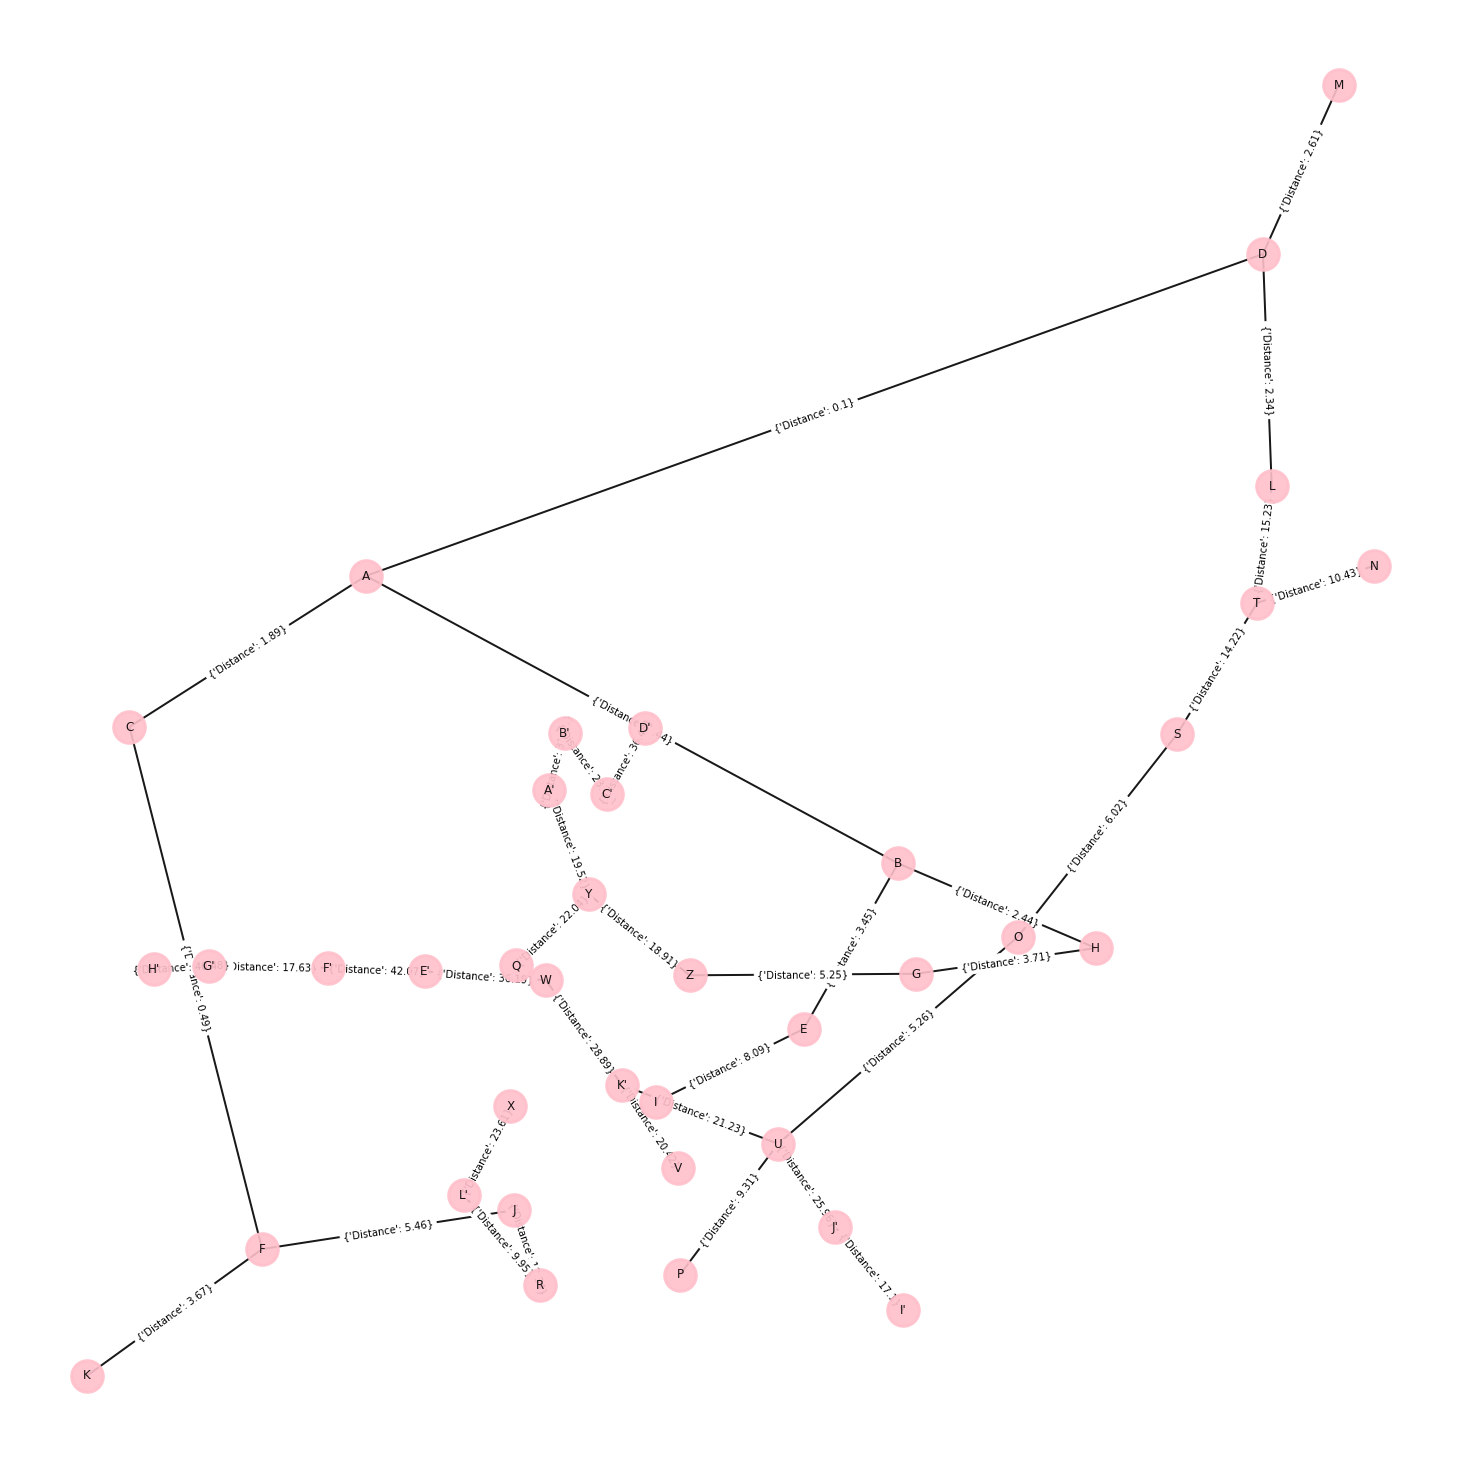

In [75]:
figure(figsize=(20, 20))
nx.draw(T,pos,edge_color='black',width=2,linewidths=3,
node_size=1000,node_color='pink',alpha=0.9,
labels={node:node for node in T.nodes()})

nx.draw_networkx_edge_labels(G,pos,edge_labels=T.edges)
plt.draw

### Shortest Path

In [10]:
print(nx.shortest_path(G,source='A',target='G'))

['A', 'B', 'H', 'G']
